### CSE-221710302060-Shaik Shoaib Aslam

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading Dataset
data = pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv')
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
# Dropping Unnecessary columns
data.drop(['CASENUM'],axis = 1,inplace = True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [4]:
# Creating user defined function to impute missing values
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace = True)
    return col

data.apply(lambda col: fill_na(col))
data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

## Question 1

#### Updated in Class Work Log

## Question 2

### Find the frequency of categories in the CLMSEX column and plot a graph. Write the observations which category people are more.

In [6]:
data.CLMSEX.value_counts()

1.0    754
0.0    586
Name: CLMSEX, dtype: int64

#### Two Categories are found in CLMSEX column, 1 represents Male, 0 represents Female

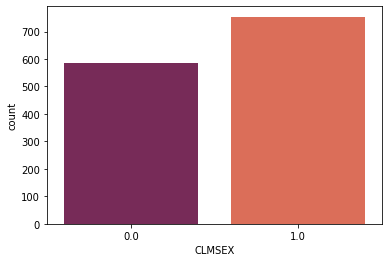

In [13]:
sns.countplot(data.CLMSEX,palette = 'rocket')

#### Observations :
    1(Male) are more in count than 0(Female) 

## Question 3

### Plot the visualizations of the column CLMAGE and find the pattern in the data like which age group people were more as claimants 


In [23]:
data.CLMAGE = pd.cut(data.CLMAGE, bins = [0,20,40,60,80,100])

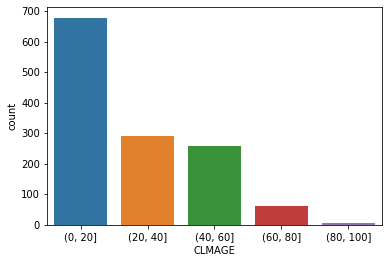

In [25]:
sns.countplot(data.CLMAGE)

#### Observations : 
    Age group of 0-20 are more as Claimants, i.e., about 680

## Question 4

### Visualize how many claimants are going to hire an attorney with respect to CLMSEX i.e., out of male claimants how many will hire an attorney; out of female how many will hire an attorney


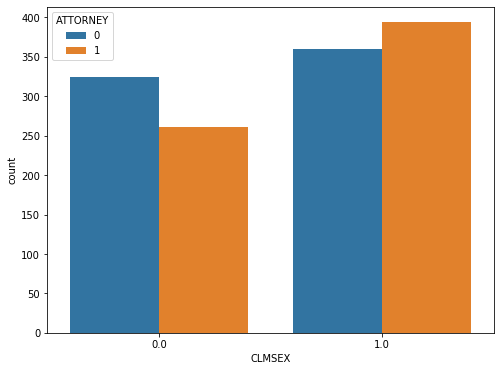

In [31]:
plt.figure(figsize = (8,6))
sns.countplot(data.CLMSEX,hue = data.ATTORNEY)

#### Observations:
    From females, about 325 do not hire attorney while 260 hire attorney
    From Males, about 350 people do not hire attorney while around 390 people hire attorney

## Question 5

### Check the correlation of the dataset and visualize it through heatmap


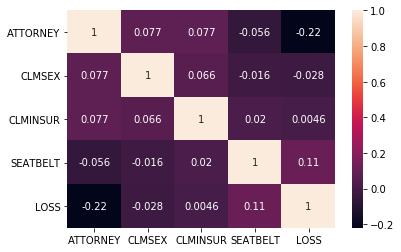

In [35]:
sns.heatmap(data.corr(),annot = True)

#### Observations :
    No Columns have higher inter-correlation
    

## Question 6

### Calculate the number people who did not wear SEATBELT, what is their percentage of hiring attorney

In [38]:
data.SEATBELT.value_counts()

0.0    1318
1.0      22
Name: SEATBELT, dtype: int64

#### 0 represents did not wear SEATBELT, 1 means wore SEATBELT
#### 1318 people did not wear SEATBELT

In [85]:
num = data[(data.SEATBELT == 0.0) & (data.ATTORNEY == 1)].shape[0]
den = data.shape[0]
res = num/den
res

0.4843283582089552